In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (download from Kaggle and place in your working directory)
df = pd.read_csv('ad_click_dataset.csv')

In [3]:
df

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0
...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,NaN,NaN,Mobile,Top,Education,NaN,0
9996,7843,User7843,NaN,Female,Desktop,Bottom,Entertainment,NaN,0
9997,3914,User3914,NaN,Male,Mobile,Side,NaN,Morning,0
9998,7924,User7924,NaN,NaN,Desktop,NaN,Shopping,Morning,1


In [4]:
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'click']


Columns: ['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'click']
Accuracy: 0.7065
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.37      0.47       705
           1       0.72      0.89      0.80      1295

    accuracy                           0.71      2000
   macro avg       0.68      0.63      0.63      2000
weighted avg       0.70      0.71      0.68      2000



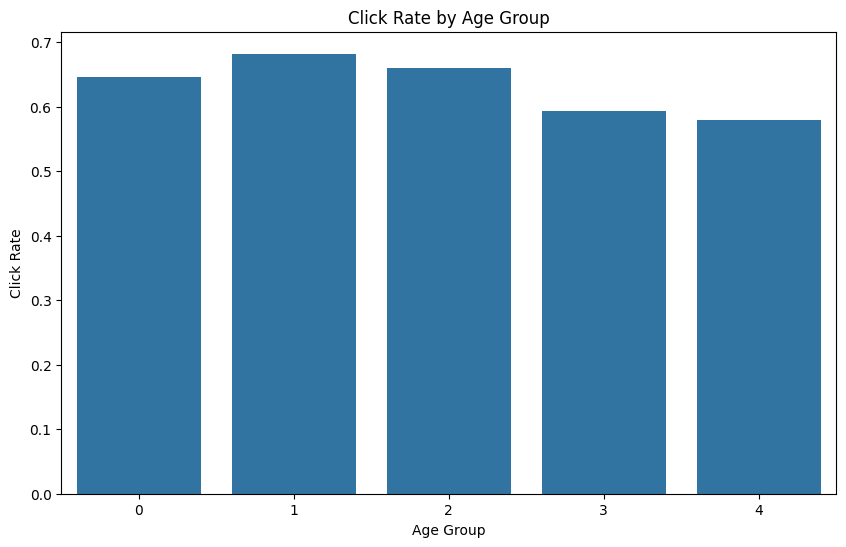

Best age group to target: 26-35


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ad_click_dataset.csv')

# Print columns to confirm
print("Columns:", df.columns.tolist())

# Handling missing values
df['age'] = df['age'].fillna(df['age'].median())
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['device_type'] = df['device_type'].fillna('Unknown')
df['ad_position'] = df['ad_position'].fillna(df['ad_position'].mode()[0])
df['browsing_history'] = df['browsing_history'].fillna('No Data')
df['time_of_day'] = df['time_of_day'].fillna(df['time_of_day'].mode()[0])

# Encoding categorical features
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
encoder = LabelEncoder()
df['device_type'] = encoder.fit_transform(df['device_type'])
df['ad_position'] = encoder.fit_transform(df['ad_position'])
df['browsing_history'] = encoder.fit_transform(df['browsing_history'])
df['time_of_day'] = encoder.fit_transform(df['time_of_day'])

# Bin Age into groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Encode AgeGroup
df['AgeGroup'] = encoder.fit_transform(df['AgeGroup'])

# Features and target
features = ['device_type', 'AgeGroup', 'ad_position', 'browsing_history', 'gender', 'time_of_day']
X = df[features]
y = df['click']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Analyze click rate by AgeGroup
X_test_with_pred = X_test.copy()
X_test_with_pred['Predicted_Click'] = y_pred
X_test_with_pred['Actual_Click'] = y_test
X_test_with_pred['AgeGroup'] = df.loc[X_test.index, 'AgeGroup']

age_clicks = X_test_with_pred.groupby('AgeGroup')['Actual_Click'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_clicks.index, y=age_clicks.values)
plt.title('Click Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Click Rate')
plt.show()

# Best age group
best_age_group = encoder.inverse_transform([age_clicks.idxmax()])[0]
print(f"Best age group to target: {best_age_group}")


In [6]:
df

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click,AgeGroup
0,670,User670,22.0,1.0,0,2,4,0,1,0
1,3044,User3044,39.5,0.0,0,2,3,2,1,2
2,5912,User5912,41.0,NaN,3,1,0,3,1,2
3,5418,User5418,34.0,0.0,3,0,1,1,1,1
4,9452,User9452,39.0,NaN,3,0,5,2,0,2
...,...,...,...,...,...,...,...,...,...,...
9995,8510,User8510,39.5,1.0,1,2,0,2,0,2
9996,7843,User7843,39.5,1.0,0,0,1,2,0,2
9997,3914,User3914,39.5,0.0,1,1,3,2,0,2
9998,7924,User7924,39.5,1.0,0,0,4,2,1,2


In [7]:
import pickle

# Save the trained model to a pickle file
with open('ad_click_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as 'ad_click_model.pkl'")


Model saved successfully as 'ad_click_model.pkl'


In [8]:
import pickle

# Save the trained model
with open("ad_click_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the label encoders
label_encoders = {
    "device_type": encoder,
    "ad_position": encoder,
    "browsing_history": encoder,
    "time_of_day": encoder,
    "AgeGroup": encoder
}
with open("label_encoders.pkl", "wb") as enc_file:
    pickle.dump(label_encoders, enc_file)

print("Model and encoders saved successfully!")


Model and encoders saved successfully!


In [11]:
X_test

,device_type,AgeGroup,ad_position,browsing_history,gender,time_of_day
6252,3,2,2,4,1.0,2
4684,0,2,2,1,1.0,2
1731,3,4,0,3,1.0,0
4742,2,2,1,3,0.0,1
4521,1,4,0,1,0.0,3
...,...,...,...,...,...,...
6412,0,2,0,3,1.0,3
8285,0,2,0,4,1.0,2
7853,0,2,0,4,1.0,2
1095,3,4,1,3,1.0,1


In [13]:
X

,device_type,AgeGroup,ad_position,browsing_history,gender,time_of_day
0,0,0,2,4,1.0,0
1,0,2,2,3,0.0,2
2,3,2,1,0,NaN,3
3,3,1,0,1,0.0,1
4,3,2,0,5,NaN,2
...,...,...,...,...,...,...
9995,1,2,2,0,1.0,2
9996,0,2,0,1,1.0,2
9997,1,2,1,3,0.0,2
9998,0,2,0,4,1.0,2


In [14]:
y

0       1
1       1
2       1
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: click, Length: 10000, dtype: int64

In [15]:
y_test

6252    1
4684    1
1731    0
4742    0
4521    0
       ..
6412    1
8285    1
7853    1
1095    1
6929    0
Name: click, Length: 2000, dtype: int64